In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

#You are importing essential libraries.
#random.seed(0), np.random.seed(0), and tf.random.set_seed(0) are used to make sure that any randomness in the code (like shuffling data) is always the same every time you run the code, so your results are reproducible.


In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

#

In [3]:
!pip install kaggle

In [4]:
kaggle_credentails = json.load(open("kaggle.json"))
#Installing Kaggle: Installs the Kaggle API to download datasets.
#Setting up Kaggle API credentials: You load your Kaggle API credentials from a kaggle.json file, then download the "PlantVillage Dataset," which contains images of plants for training the model.

In [5]:
os.environ['KAGGLE_USERNAME']=kaggle_credentails["username"]
os.environ['KAGGLE_KEY']=kaggle_credentails["key"]

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:17<00:00, 224MB/s]
100% 2.04G/2.04G [00:17<00:00, 126MB/s]


In [7]:
#unzipfile
with ZipFile("plantvillage-dataset.zip",'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

#You check the files in the dataset directory to ensure everything is correctly downloaded.


['grayscale', 'color', 'segmented']
38
['Soybean___healthy', 'Squash___Powdery_mildew', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___healthy', 'Peach___Bacterial_spot']
38
['Soybean___healthy', 'Squash___Powdery_mildew', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___healthy', 'Peach___Bacterial_spot']
38
['Soybean___healthy', 'Squash___Powdery_mildew', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___healthy', 'Peach___Bacterial_spot']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['29fe6146-b910-437d-991b-9f684c876846___Mt.N.V_HL 8999.JPG', 'cad08b01-b03c-4bee-a786-a6118ec09c37___Mt.N.V_HL 6081.JPG', 'c95315d3-0a8f-476e-9eee-c6c9f4246841___Mt.N.V_HL 6197.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', 'd1d71d89-a456-4ac7-9388-9d9871691382___Mt.N.V_HL 6205.JPG']


In [ ]:
#Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


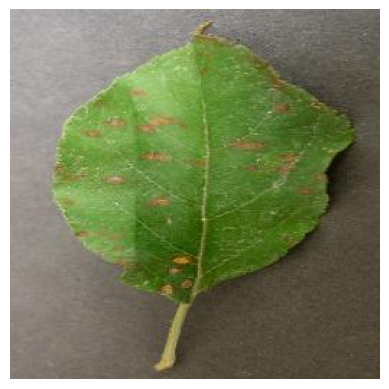

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

#Read The image
img = mpimg.imread(image_path)
print(img.shape)
#display the image
plt.imshow(img)
plt.axis('off')
plt.show()

#This reads and displays a sample image from the dataset. It helps you visualize what kind of data the model will work with.

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

#Read The image
img = mpimg.imread(image_path)

print(img)


[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:
#image parameter
img_size=224
batch_size=32

In [ ]:
#image data generators
data_gen= ImageDataGenerator(
    rescale=1./255, #to make value of array in range of 1 -0
    validation_split=0.2 #use 20% of data for validation
)#will give array

In [ ]:
# Train Generator
train_generator= data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator= data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
#model Defiition
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2)) #finds diff feature in image , removes sapatial

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten()) #to make data 1D
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))#detects the class of image
#softmax ->we have 38 neurons and each nuron gives probability of image match , we select high probalility then look into class ad display class

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size, #number of steps per epoch
    epochs=5,#number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size #Validation steps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 132s 92ms/step - accuracy: 0.6064 - loss: 1.8599 - val_accuracy: 0.8173 - val_loss: 0.5637
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.3662
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 106s 78ms/step - accuracy: 0.9143 - loss: 0.2625 - val_accuracy: 0.8670 - val_loss: 0.4330
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.3947e-05
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 134s 75ms/step - accuracy: 0.9648 - loss: 0.1083 - val_accuracy: 0.8725 - val_loss: 0.4747


In [ ]:
#Model Evalution
print("Evaluating model...")
val_loss, val_accuracy= model.evaluate(validation_generator,steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy :{val_accuracy*100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.8750 - loss: 0.4749
Validation Accuracy :87.26%


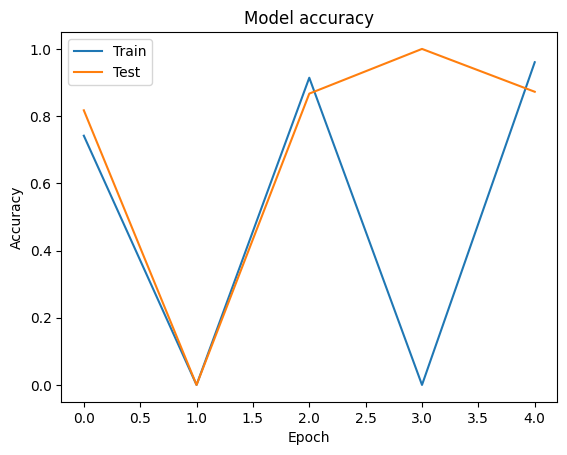

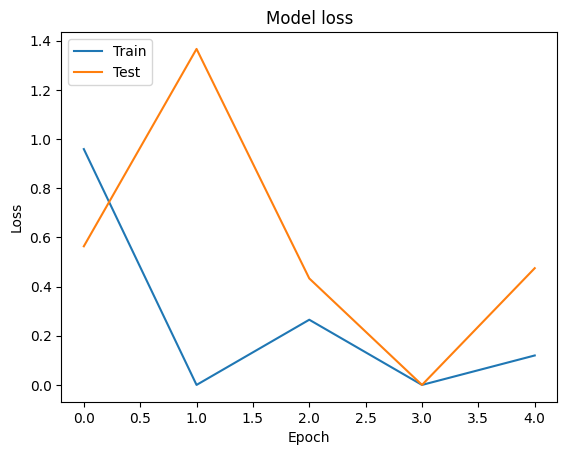

In [ ]:
#plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [ ]:
#  #Function to load and preprocess the image using Pillow
# def load_and_preprocess_image(image_path, target_size=(224, 224)):
#     # Load the image
#     img = Image.open(image_path)
#     # Resize the image
#     img = img.resize(target_size)
#     # Convert the image to a numpy array
#     img_array = np.array(img)
#     # Add batch dimension
#     img_array = np.expand_dims(img_array, axis=0)
#     # Scale the image values to [0, 1]
#     img_array = img_array.astype('float32') / 255.
#     return img_array

# #Function to predict the class of an image
# def predict_image_class(model,image_path,class_indices):
#   preprocessed_img=load_and_preprocess_image(image_path)
#   predictions = model.predict(preprocessed_img)
#   predicted_class_index = np.argmax(predictions,axis=1)[0] #will return highest probability value
#   predicted_class_name= class_indices[predicted_class_index]
#   return predicted_class_name

# Function to load and preprocess the image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the original image
    img = Image.open(image_path)

    # Resize the image for preprocessing (this will be used by the model)
    preprocessed_img = img.resize(target_size)

    # Convert the preprocessed image to a numpy array
    img_array = np.array(preprocessed_img)

    # Add batch dimension to match model input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.

    # Return both original and preprocessed images
    return img, img_array

# Function to predict the class of an image and show original and preprocessed images
def predict_image_class(model, image_path, class_indices):
    # Load and preprocess the image
    original_img, preprocessed_img = load_and_preprocess_image(image_path)

    # Predict the class of the preprocessed image
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get the highest probability class
    predicted_class_name = class_indices[predicted_class_index]

    # Plot both original and preprocessed images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image
    axes[0].imshow(original_img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Display the preprocessed image (scaled back to [0, 255] for visualization)
    axes[1].imshow((preprocessed_img[0] * 255).astype(np.uint8))
    axes[1].set_title("Preprocessed Image")
    axes[1].axis('off')

    plt.show()

    return predicted_class_name



In [ ]:
#create a mapping from class indices to class names
class_indices = {v:k for k,v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
#saving the class names as json files
json.dump(class_indices, open('class_indices.json','w'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


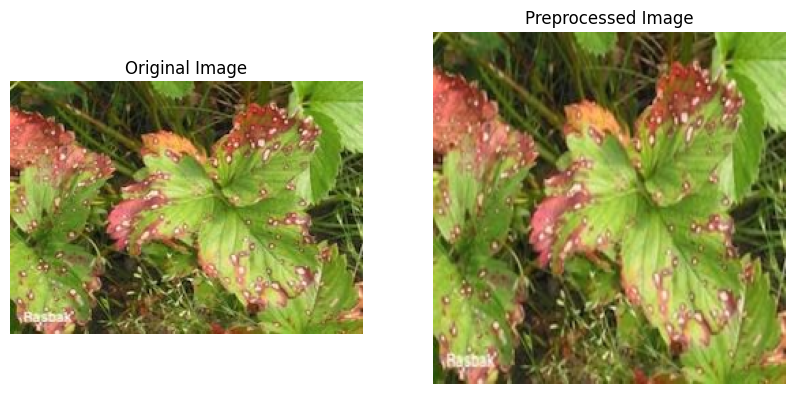

Predicted Class Name: Corn_(maize)___Northern_Leaf_Blight


In [ ]:
# Example usage
# image_path = '/content/ryth.jpg'
image_path = '/content/dge.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the predicted class
print("Predicted Class Name:", predicted_class_name)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.save('/content/drive/MyDrive/MP/cropdiseasedetectionmodel.h5')